In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('./Cleaned_Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [75]:
df.shape

(243, 15)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [77]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [78]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [79]:
df.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [80]:
df.Classes.value_counts()

Classes
fire             131
not fire         100
fire               4
not fire           3
fire               2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [81]:
df.Classes = np.where(df.Classes.str.contains('not fire'), 'not fire', 'fire')

In [82]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [83]:
df.Classes = np.where(df.Classes.str.contains('not fire'), 0, 1)

In [84]:
X = df.drop(df.FWI.name, axis=1)
y = df.FWI

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

Feature Selection based on Correlation

In [86]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0


In [87]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


Checking for Multicolinearity

<Axes: >

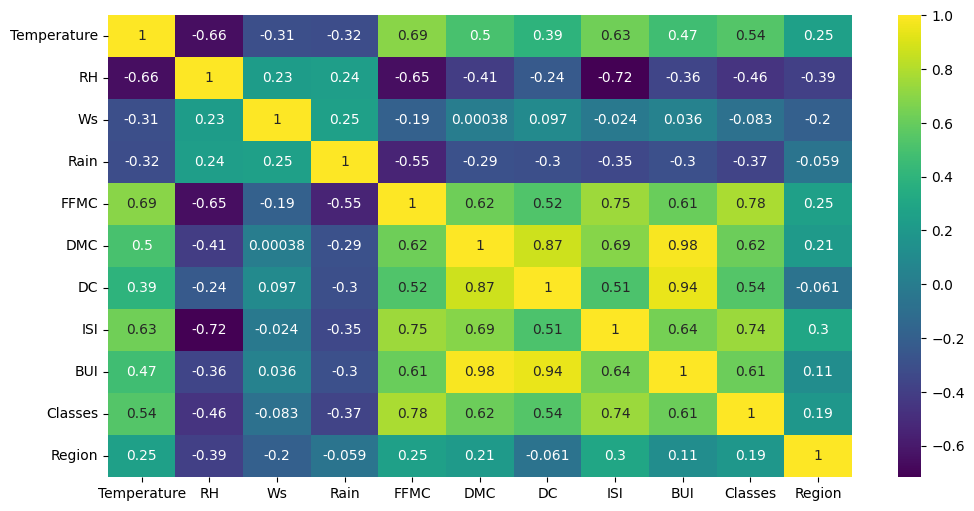

In [88]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')

In [89]:
def correlation_checker(df, threshold):
  col_corr = set()
  corr_matrix = df.corr()
  for i in range(corr_matrix.shape[0]):
    for j in range(i):
      if corr_matrix.columns[i] not in col_corr and abs(corr_matrix.iloc[i, j]) > threshold:
        col_corr.add(corr_matrix.columns[i])
  return col_corr

In [90]:
# threshold value set by --- domain expertise
features_drop = correlation_checker(X_train, .85)

In [91]:
# drop features when correlation more than .85
X_train.drop(features_drop, axis=1, inplace=True)
X_test.drop(features_drop, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

Feature Scaling or Standardization

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Box Plot to understand Scaling changes

<Axes: title={'center': 'X_test_scaled'}>

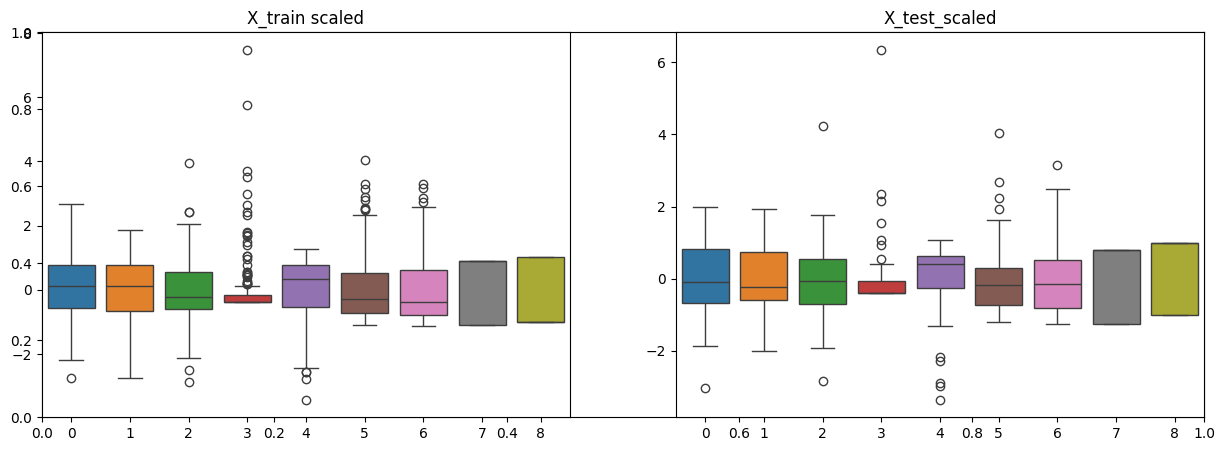

In [93]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("X_train scaled")
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
plt.title("X_test_scaled")
sns.boxplot(data=X_test)

Linear Regression Model

In [94]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred = slr.predict(X_test)

In [95]:
slr.coef_, slr.intercept_

(array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
         3.6982583 ,  4.84057298,  0.40422124, -0.39259928]),
 7.156043956043957)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

mae, mse, rmse, r2score, adjusted_r2score

(0.9939450225331392,
 1.7391885638204783,
 1.3187829858701083,
 0.9607056657860651,
 0.9537713715130177)

In [97]:
# Cross Validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(slr, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print(validation_score)
np.mean(validation_score)

[-1.45610277 -5.18154466 -1.74232466]


-2.7933240294438435

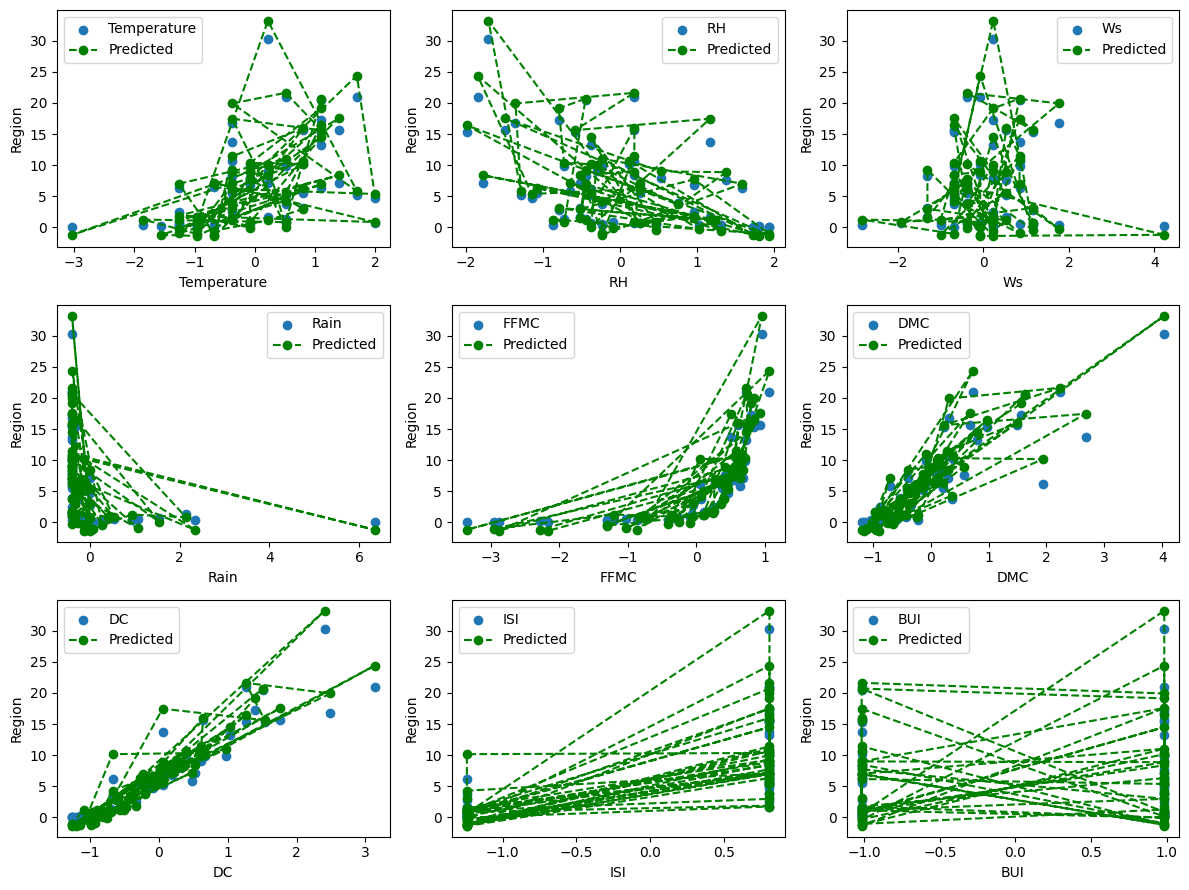

In [98]:
fig, axs = plt.subplots(3, 3, figsize=(12, 9))  # 3 rows, 3 cols, adjust height
axs = axs.flatten()  # turn into 1D list of Axes

for i, ax in enumerate(axs):
    ax.scatter(X_test[:, i], y_test, label=df.columns[i])
    ax.plot(X_test[:, i], y_pred, marker='o', color='green', linestyle='dashed', label="Predicted")
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel(df.columns[-1])
    ax.legend()

plt.tight_layout()
plt.show()

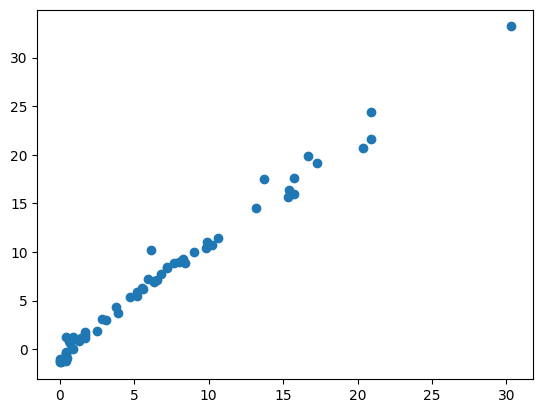

In [99]:
plt.scatter(y_test, y_pred)

Lasso Regression Implementation

0.9605020166901076 1.3589274038116672 1.1657304164392672 0.9692970913627958 0.963878931015054


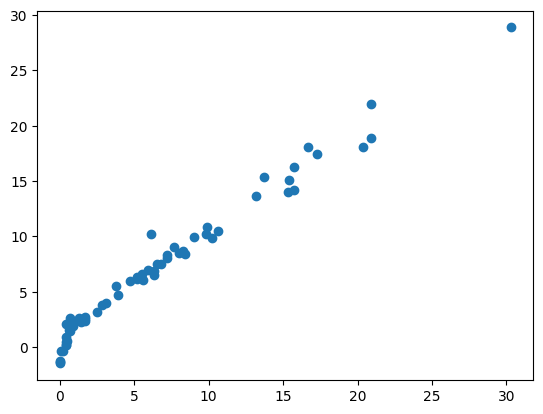

In [104]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(mae, mse, rmse, r2score, adjusted_r2score)
plt.scatter(y_test, y_pred)

Ridge Regression Implementation

0.986207080288441 1.6975754626951096 1.3029103816821437 0.9616458508455313 0.9548774715829781


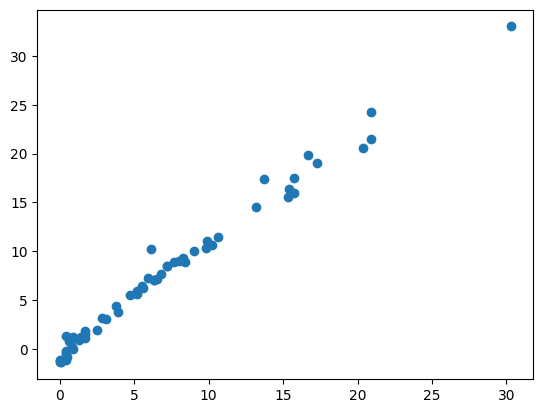

In [105]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(mae, mse, rmse, r2score, adjusted_r2score)
plt.scatter(y_test, y_pred)

ElasticNet Regression Implementation

1.6511868133560939 4.064436888454821 2.0160448627088687 0.9081701979826986 0.8919649388031748


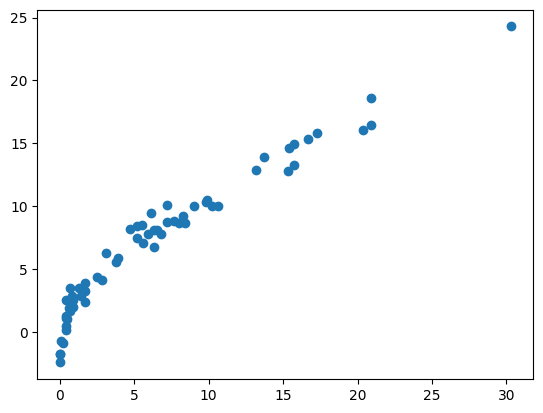

In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(mae, mse, rmse, r2score, adjusted_r2score)
plt.scatter(y_test, y_pred)

Cross Validation Lasso

In [110]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)


LassoCV(cv=5)

In [112]:
lasso_cv.alpha_, lasso_cv.alphas_

(0.05725391318234408,
 array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
        4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
        3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
        2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
        1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
        1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
        0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
        0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
        0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
        0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
        0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
        0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
        0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
        0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
        0.05339519, 0.0497

In [115]:
lasso_cv.mse_path_.shape

(100, 5)

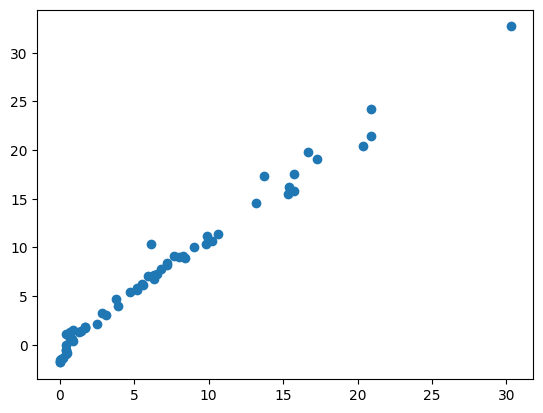

In [117]:
y_pred = lasso_cv.predict(X_test)
plt.scatter(y_test, y_pred)

You can perform same for RidgeCV and ElasticNetCV